# Introduction to graphs with NetworkX and Pytorch Geometric

In this notebook, we will introduce the basics of graph theory and how to work with graphs in Python using the NetworkX library. We will also show how to use the Pytorch Geometric library to work with graphs in Pytorch, before using this library for GNNs.
 

## A first graph
### Creating and Exploring a Simple Graph

Create an empty graph with NetworkX and add two adjacent nodes to it.

Is this graph directed? Check the number of nodes.

### Questions
- What is the difference between a directed and an undirected graph?
- Why do we check the number of nodes and edges? What information do these values give us about the graph's structure?

Explore these questions as you run the code and observe the output.

#### Reflection

After checking the number of nodes and edges, consider the following:
- **What does the number of edges tell you about the connections between nodes?**
- **If you added more nodes without connecting them with edges, how would that affect the structure?**

These questions help you think about the balance between nodes and edges in different graphs.

In [2]:
import networkx as nx

G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_edge(1, 2)
print(G.nodes())
print(G.size())

print(G.order())
print(G.number_of_nodes())

print(G.is_directed())

[1, 2]
1
2
2
False


## Different types of graphs

Create a directed graph. Add a few labeled nodes to it. Add also a few edges with labels.

For labels names and values, you can use any string or number. Choose the feature name you want.

Observe how labels are stored.

#### Exercise: Checking Directed Graphs

After creating a directed graph with labels and weights, try to answer:
- **Why might a directed graph be useful in representing real-world data, like web page links or social network interactions?**
- **How do the edge weights influence your interpretation of the connections?**

Try adding additional nodes with different labels and edges with varying weights. Observe how this additional information is stored and accessed. This will help you understand how labeling works and how it can be used to represent various aspects of a network.


In [3]:
G = nx.DiGraph()
G.add_node(1, label='A')
G.add_node(2, label='B')
G.add_node(3, label='A')
G.add_node(4, label='B')

G.add_edge(1, 2, weight=1)
G.add_edge(2, 3, weight=2)
G.add_edge(3, 4, weight=3)

print(G.nodes(data=True))
print(G.edges(data=True))


[(1, {'label': 'A'}), (2, {'label': 'B'}), (3, {'label': 'A'}), (4, {'label': 'B'})]
[(1, 2, {'weight': 1}), (2, 3, {'weight': 2}), (3, 4, {'weight': 3})]


### Exploring Zachary's Karate Club Network

The **Zachary's karate club network** is a well-known example in social network analysis. It represents 34 members of a karate club with edges indicating interactions between them outside the club.

#### Questions:
- What does each node represent in this network?
- Is a directed or undirected graph ? 


In [4]:
G = nx.karate_club_graph()

In [5]:
print(G.number_of_nodes())
print(G.number_of_edges())
print(G.is_directed())

34
78
False


### Questions
* Visualize the karate club graph and describe its structure. Are there any noticeable clusters or patterns
* Analyse the distribution of node degrees in the graph. What do these values tell you about the network?

### Reflection: Karate Club Graph

After visualizing the Karate Club graph, reflect on these questions:
- What does the clustering of nodes suggest about the social structure within the club?
- If you were to remove certain edges, how would that impact the graph's connectivity?

These reflections help you interpret the graph's structure and connectivity.

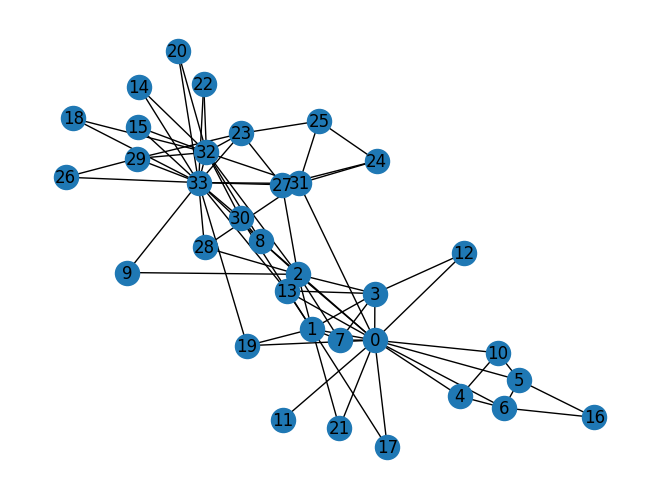

In [5]:
nx.draw(G, with_labels=True)

33
10.544117647058824


(array([12., 12.,  3.,  2.,  0.,  2.,  1.,  0.,  0.,  2.]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <BarContainer object of 10 artists>)

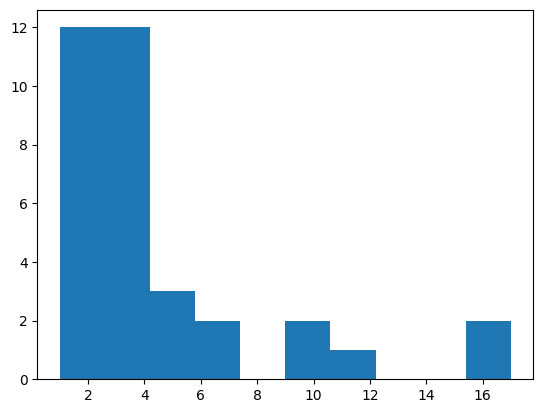

In [6]:
import numpy as np
import matplotlib.pyplot as plt

print(np.max(G.degree()))
print(np.mean(G.degree()))

plt.hist(list(dict(G.degree()).values()))


### Extracting Subgraph of Mr Hi's Friends

Using the Zachary's Karate Club graph, extract the subgraph corresponding to Mr Hi's friends.

#### Questions:
- How can you identify the nodes that represent Mr Hi's friends in the graph?
- What steps are necessary to extract the subgraph containing only these nodes?
- How does the structure of this subgraph compare to the overall structure of the original graph?

Reflect on these questions as you extract and analyze the subgraph.


3

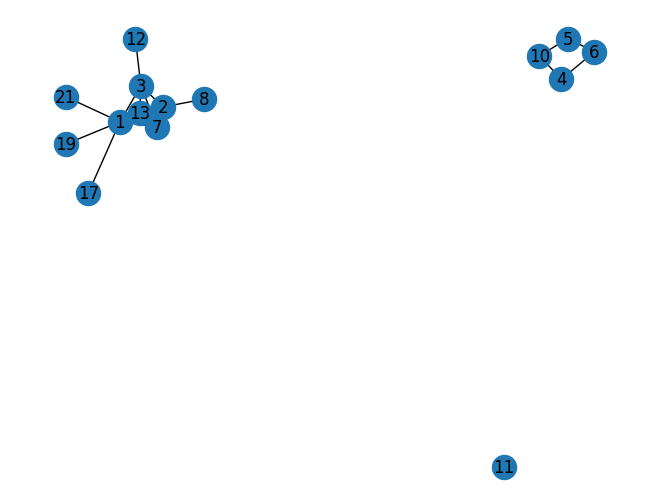

In [7]:
# Extract the subgraph of Mr Hi's friendsaa
subgraph = G.subgraph([n for n in G.neighbors(0) if G.nodes(data=True)[n]['club'] == 'Mr. Hi'])
nx.draw(subgraph, with_labels=True)
nx.number_connected_components(subgraph)

### Visualizing the Adjacency Matrix

#### Questions:
- How does the adjacency matrix represent the connections between nodes in the graph?
- What patterns or structures can you observe in the adjacency matrix?
- How might the adjacency matrix be useful for understanding the overall structure of the graph?


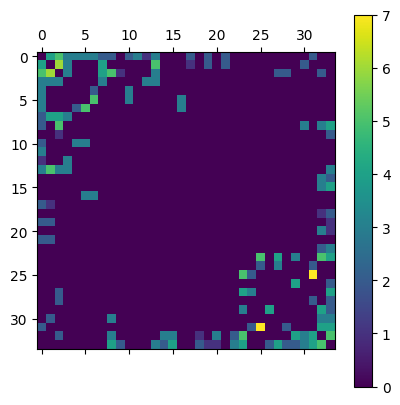

In [8]:
# Visualize adjacency matrix 

nx.adjacency_matrix(G).todense()

plt.matshow(nx.adjacency_matrix(G).todense())
plt.colorbar()

### Questions:
- Compute the Laplacian matrix of the graph `G` and its eigendecomposition.
- What do the eigenvalues and eigenvectors of the Laplacian matrix represent in the context of the graph?
- How can the eigenvalues be used to understand the structure and properties of the graph?

Reflect on these questions as you compute and analyze the Laplacian matrix and its eigendecomposition.

[-2.88600632e-15  1.18710730e+00  2.39431926e+00  2.93182048e+00
  2.96830180e+00  3.06104079e+00  3.12126310e+00  3.70606484e+00
  3.80094429e+00  4.16160574e+00  4.54469763e+00  4.69727550e+00
  4.97817925e+00  5.16855490e+00  5.59481244e+00  6.44605541e+00
  6.97788032e+00  9.18096651e+00  1.00106981e+01  1.02218147e+01
  1.18744202e+01  1.20754027e+01  1.43813508e+01  1.48885752e+01
  1.70337951e+01  1.93238240e+01  2.13586504e+01  2.27849630e+01
  2.55555039e+01  2.96883840e+01  3.79927558e+01  4.18328632e+01
  4.59907681e+01  5.20653410e+01]


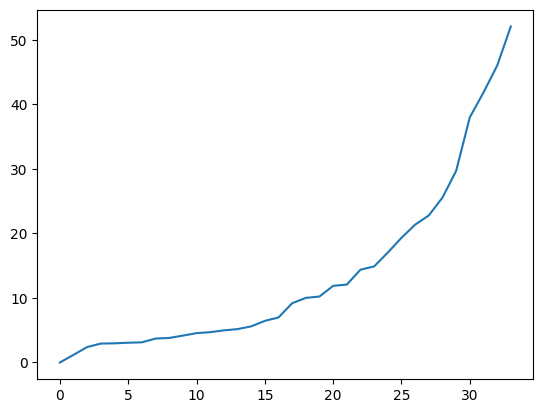

In [40]:
# visualize laplacian 

laplace_matrix = nx.laplacian_matrix(G).todense()

v,w = np.linalg.eigh(laplace_matrix)

print(v)
plt.plot(v)

### Questions:
- Check the values for first and second eigenvectors of the Laplacian matrix of the graph.
- Draw the graph with values of the second eigenvector as node colors.
- Draw the graph with sign of the values of the first eigenvector as node colors.
- What patterns or clusters can you observe from the colored graph?


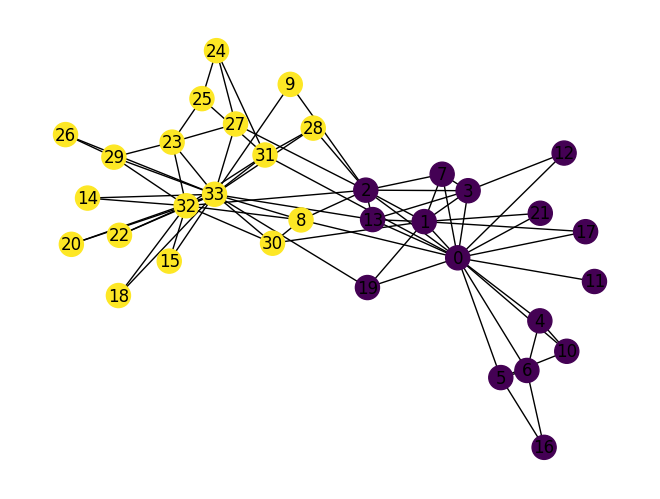

In [50]:
# Draw the graph G with nodes colored according to the first eigenvector w[:,0]
node_colors = w[:, 1]<0
nx.draw(G, node_color=node_colors, with_labels=True, cmap=plt.cm.viridis)
plt.show()


## Seven bridges of Königsberg

The Seven Bridges of Königsberg is a famous problem in graph theory. The city of Königsberg in Prussia (now Kaliningrad, Russia) was set on both sides of the Pregel River, and included two large islands which were connected to each other and the mainland by seven bridges.

The problem was to find a walk through the city that would cross each bridge once and only once and come back to the starting point. The islands could not be reached by any route other than the bridges, and every bridge must have been crossed completely every time.

![](https://upload.wikimedia.org/wikipedia/commons/5/5d/Konigsberg_bridges.png)

Create a graph representing the Seven Bridges of Königsberg. What kind of graphs do you choose to represent the city and its bridges?

> **Hint** : 
> To draw multiple edges between two nodes, you can use the option `connectionstyle` in the `draw_networkx_edges` function. For example, `connectionstyle="arc3,rad=0.1"` will draw a curved line between two nodes.


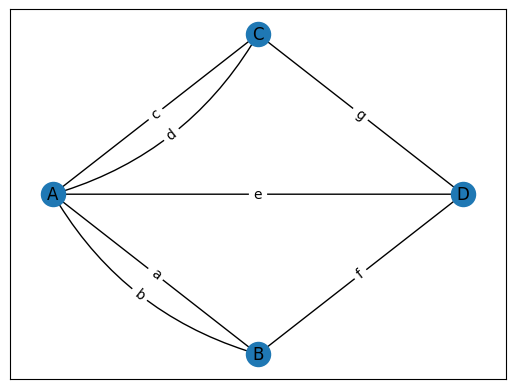

In [13]:
G = nx.MultiGraph()
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")

G.add_edge("A", "B", label="a")
G.add_edge("A", "B", label="b")
G.add_edge("A", "C", label="c")
G.add_edge("A", "C", label="d")
G.add_edge("A", "D", label="e")
G.add_edge("B","D", label="f")
G.add_edge("C","D", label="g")

positions = {"A": (0, 0), "B": (.5, -1), "C": (.5, 1), "D": (1, 0)}

nx.draw_networkx_nodes(G, pos=positions) 
nx.draw_networkx_labels(G, pos=positions)

edge_labels = nx.get_edge_attributes(G, "label")

# Draw parallel edges with different rad values to avoid overlap
for i, (u, v, key) in enumerate(G.edges(keys=True)):
    rad = 0.0 + (key * 0.2)  # Adjust rad value for each edge
    nx.draw_networkx_edges(G, pos=positions, edgelist=[(u, v)], connectionstyle=f"arc3,rad={rad}")
    nx.draw_networkx_edge_labels(G, pos=positions, edge_labels={(u, v, key): edge_labels[(u, v, key)]}, connectionstyle=f"arc3,rad={rad}")



### Questions

- Can you find a path that crosses each bridge exactly once and come back to the starting point ? Whats the name of such a path ?

In [14]:
nx.is_eulerian(G)

False

- A slightly different question : Can yo draw this figure while keeping the pen on the sheet, and drawing each line exactly once ?  

True
False


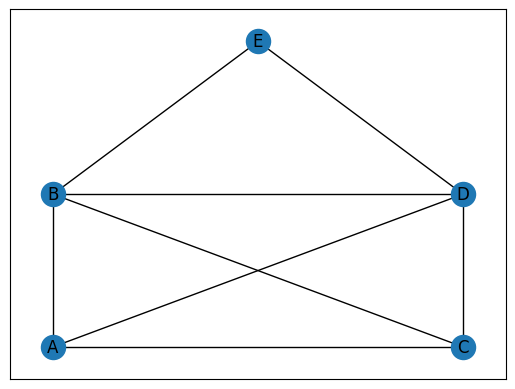

In [15]:
G = nx.Graph()
positions = {"A": (0, 0), "B": (0, 1), "C": (1, 0), "D": (1, 1), "E":(.5,2)}
G.add_nodes_from(positions.keys())
G.add_edges_from([("A", "B"), ("A", "C"), ("B", "C"), ("B", "D"), ("C", "D"), ("D", "E"), ("B", "E"),("D","A")])
nx.draw_networkx(G, pos=positions)
print(nx.is_semieulerian(G))
print(nx.is_eulerian(G))


# Isomorphism

Two graphs are isomorphic if they have the same number of nodes and the same number of edges, and there is a one-to-one correspondence between the nodes of the two graphs such that the adjacency relationships are preserved.

In this section, we will explore the concept of graph isomorphism and how it can be used to compare and analyze different graphs. We will also explore the methods to check if two graphs "could" be isomorphic.



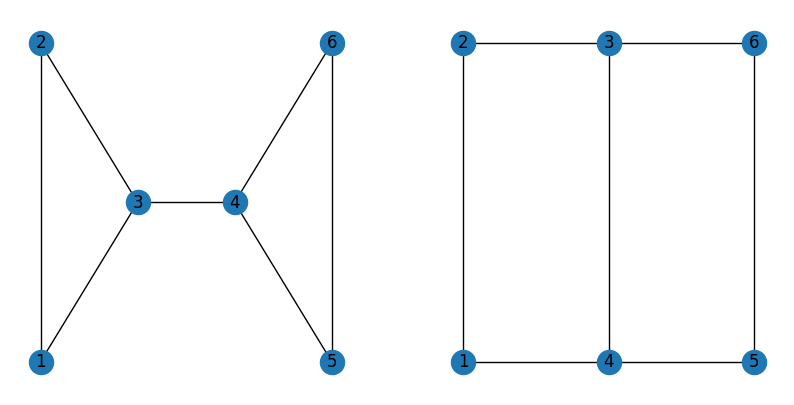

In [88]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

G1 = nx.Graph()
positions_G1 = {1: (0,0), 2: (0, 1), 3: (1, 0.5), 4: (2, .5), 5:(3,0), 6:(3,1)}
G1.add_edges_from([(1, 2), (1, 3), (2,3), (3, 4),(4,5),(4,6),(6,5)])
nx.draw(G1, with_labels=True, pos=positions_G1,ax=axes[0])

G2 = nx.Graph()
positions_G2 = {1: (0,0), 2: (0, 1), 3: (1, 1), 4: (1,0), 5:(2,0), 6:(2,1)}
G2.add_edges_from([(1, 2),  (2,3), (1, 4), (3, 4),(4,5),(3,6),(6,5)])
nx.draw(G2, with_labels=True,ax=axes[1],pos=positions_G2)



- According to the number of nodes and edges, can these two graphs be isomorphic to each other? 

- If you consider the degree, can these two graphs be isomorphic to each other?

- Check if the two graphs are isomorphic using the NetworkX library. What is the result? Try the same with approximate isomorphism.

In [90]:

print(G1.number_of_edges(), G2.number_of_edges())
print(G1.number_of_nodes(), G2.number_of_nodes())

print(G1.degree())
print(G2.degree())

print(nx.faster_could_be_isomorphic(G1, G2))
print(nx.fast_could_be_isomorphic(G1, G2))
print(nx.could_be_isomorphic(G1, G2))
print(nx.is_isomorphic(G1, G2))


7 7
6 6
[(1, 2), (2, 2), (3, 3), (4, 3), (5, 2), (6, 2)]
[(1, 2), (2, 2), (3, 3), (4, 3), (5, 2), (6, 2)]
True
False
False
False


# Pytorch Geometric

Pytorch Geometric is a library for working with graphs in Pytorch. It provides a lot of useful tools for creating, manipulating and training on graphs. It will be very useful for the next notebooks to develop Graph Neural Networks.


## Network dataset

Let's first load a dataset from the Pytorch Geometric library. We will use the `Cora` dataset, which is a citation network of scientific papers. Each node represents a paper, and each edge represents a citation between two papers. The task is to predict the category of each paper.

### Questions
- Load the Cora dataset using Pytorch Geometric. 
- How many nodes and edges are in the Cora dataset?
- What are the features of the nodes and edges in the Cora dataset?

In [17]:
from torch_geometric.datasets import Planetoid

# Load the Cora dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')

# Print basic information about the dataset
print(f'Dataset: {dataset}')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Get the first graph object
data = dataset[0]

# Print information about the graph
print(data)
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Training nodes: {data.train_mask.sum()}')
print(f'Validation nodes: {data.val_mask.sum()}')
print(f'Test nodes: {data.test_mask.sum()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: Cora()
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Training nodes: 140
Validation nodes: 500
Test nodes: 1000
Is undirected: True


### Visualization of the Cora Dataset

The Cora dataset is a citation network where each node represents a scientific paper, and each edge represents a citation between two papers. 

#### Questions:
- What does the `y` value represent in the Cora dataset?
- Visualize the Cora dataset using NetworkX by coloring each node according to its `y` value. What does the visualization reveal about the structure of the citation network?
- Are there any noticeable clusters or patterns in the network?
- How might the structure of the network influence the task of predicting the category of each paper?


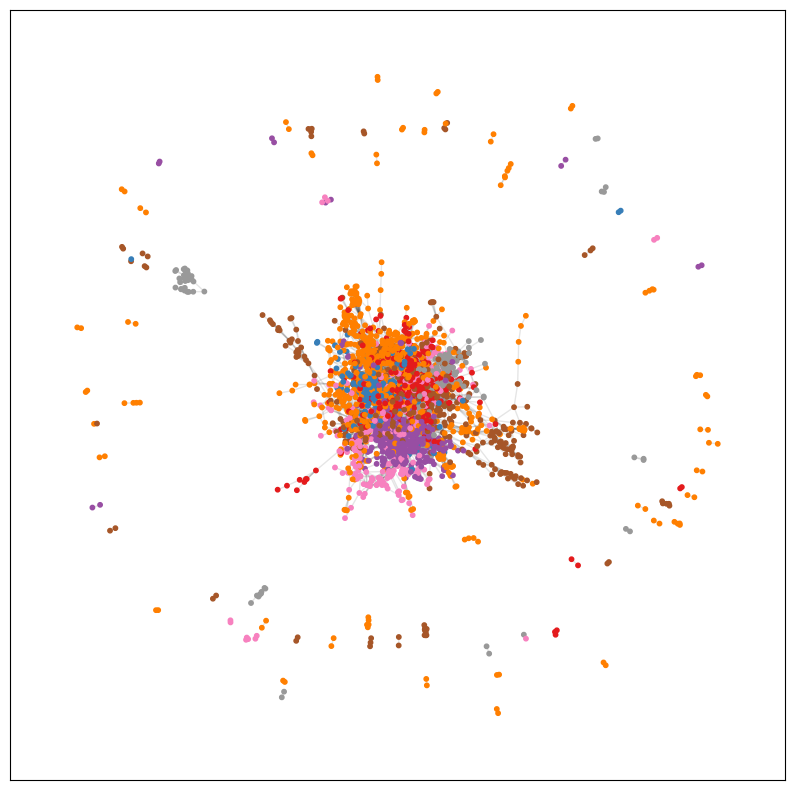

In [20]:
import networkx as nx
from torch_geometric.utils import to_networkx

import matplotlib.pyplot as plt

G_cora = to_networkx(data, to_undirected=True)

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_cora)
nx.draw_networkx_nodes(G_cora, pos=pos, node_size=10, node_color=data.y, cmap='Set1')
nx.draw_networkx_edges(G_cora, pos=pos, alpha=0.1)

plt.show()

## Molecular Dataset

In this section, we will load a molecular dataset from the Pytorch Geometric library. We will use the `MUTAG` dataset, which contains molecular graphs representing chemical compounds.

### Questions
- Load the MUTAG dataset using Pytorch Geometric.
- How many graphs are in the MUTAG dataset?
- How many nodes and edges are in the MUTAG dataset?

In [29]:
from torch_geometric.datasets import TUDataset

# Load the MUTAG dataset
mutag_dataset = TUDataset(root='/tmp/MUTAG', name='MUTAG', use_node_attr=True)

# Print basic information about the dataset
print(f'Dataset: {mutag_dataset}')
print(f'Number of graphs: {len(mutag_dataset)}')
print(f'Number of features: {mutag_dataset.num_features}')
print(f'Number of classes: {mutag_dataset.num_classes}')

# Get the first graph object
mutag_data = mutag_dataset[0]

# Print information about the first graph
print(mutag_data)
print(f'Number of nodes: {mutag_data.num_nodes}')
print(f'Number of edges: {mutag_data.num_edges}')
print(f'Average node degree: {mutag_data.num_edges / mutag_data.num_nodes:.2f}')
print(f'Is undirected: {mutag_data.is_undirected()}')

Dataset: MUTAG(188)
Number of graphs: 188
Number of features: 7
Number of classes: 2
Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])
Number of nodes: 17
Number of edges: 38
Average node degree: 2.24
Is undirected: True


We will extract two graphs from the MUTAG dataset, one for each class, and visualize them. We will also check if these graphs are isomorphic.

### Questions:
- How do the structures of the two graphs compare?
- Are there any noticeable differences in the node or edge features?
- What could differentiate these graphs in terms of their structure or features?

By analyzing these questions, we can gain insights into the characteristics of the graphs in the MUTAG dataset and how they might be used for classification tasks.


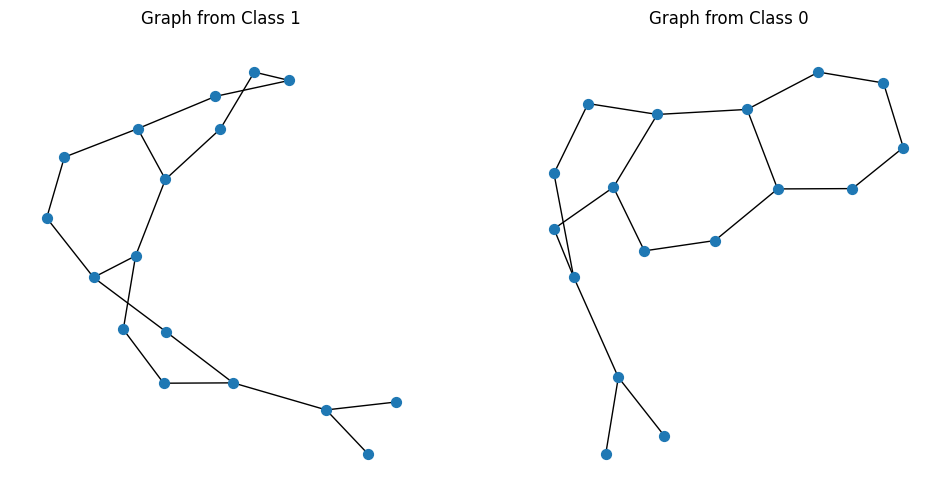

False

In [30]:
# Extract two graphs from the MUTAG dataset, one for each class
id_1 = 0
id_2 = 1
G1 = to_networkx(mutag_dataset[id_1]).to_undirected()  # Assuming the first graph belongs to class 0
G2 = to_networkx(mutag_dataset[id_2]).to_undirected()
# Draw the graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

nx.draw(G1, ax=axes[0], node_size=50, with_labels=False)
axes[0].set_title(f"Graph from Class {mutag_dataset[id_1]['y'].item()}")

nx.draw(G1, ax=axes[1], node_size=50, with_labels=False)
axes[1].set_title(f"Graph from Class {mutag_dataset[id_2]['y'].item()}")

plt.show()

nx.is_isomorphic(G1, G2)


### Checking for Isomorphic Graphs in the MUTAG Dataset

In this section, we will check for isomorphic graphs within the MUTAG dataset

#### Questions:
- How can you determine if two graphs in the MUTAG dataset are isomorphic?
- Write a function to check if two graphs are isomorphic.
- Iterate through the MUTAG dataset and identify all pairs of isomorphic graphs. What are the results?
- What do you think is missing in the graph representation to make the graphs isomorphic?

In [31]:
from torch_geometric.utils import to_networkx

# Function to check if two graphs are isomorphic
def are_isomorphic(graph1, graph2):
    G1 = to_networkx(graph1).to_undirected()
    G2 = to_networkx(graph2).to_undirected()
    return nx.is_isomorphic(G1, G2)

# Iterate through the dataset and check for isomorphic pairs
isomorphic_pairs = []
for i in range(len(mutag_dataset)):
    for j in range(i + 1, len(mutag_dataset)):
        if are_isomorphic(mutag_dataset[i], mutag_dataset[j]):
            isomorphic_pairs.append((i, j))

print(f'Isomorphic pairs: {isomorphic_pairs}')

Isomorphic pairs: [(0, 43), (1, 2), (1, 39), (1, 97), (2, 39), (2, 97), (4, 138), (4, 143), (4, 180), (7, 157), (8, 114), (8, 155), (8, 171), (8, 175), (8, 185), (9, 21), (9, 24), (9, 27), (9, 34), (9, 40), (9, 60), (10, 104), (11, 158), (18, 33), (19, 96), (21, 24), (21, 27), (21, 34), (21, 40), (21, 60), (24, 27), (24, 34), (24, 40), (24, 60), (25, 112), (25, 168), (26, 45), (27, 34), (27, 40), (27, 60), (34, 40), (34, 60), (39, 97), (40, 60), (41, 137), (41, 146), (44, 87), (46, 133), (46, 162), (47, 55), (47, 78), (50, 160), (55, 78), (61, 134), (67, 117), (71, 82), (77, 113), (83, 110), (83, 167), (86, 187), (89, 103), (91, 102), (91, 124), (92, 100), (102, 124), (110, 167), (111, 147), (112, 168), (114, 155), (114, 171), (114, 175), (114, 185), (127, 152), (128, 154), (129, 131), (133, 162), (137, 146), (138, 143), (138, 180), (143, 180), (155, 171), (155, 175), (155, 185), (171, 175), (171, 185), (175, 185)]
